<a href="https://colab.research.google.com/github/BlackCurrantDS/ATiML-Project/blob/master/Word_Clouds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Starting with meta data feature extractions
#Importing the file
import pandas as pd
books = pd.read_csv("books.csv")
books.head(5)

,Unnamed: 0,Data,guten_genre
0,0,"DEDICATED TO My Brother, ALLAN MELVILLE.\nNot ...",Sea and Adventure
1,1,We were now voyaging straight for Maramma; whe...,Sea and Adventure
2,2,"""Looking up, he saw a slender little girl in a...",Sea and Adventure
3,3,FROM the heart of a great hill land Glenavelin...,Sea and Adventure
4,4,This is a yarn of the days when the clipper sa...,Sea and Adventure


World clouds

In [0]:
#Importing NLTK libariaries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

In [0]:
import numpy as np
# changing the data type of columns
books.data = books.data.astype(str)
books.Author_Name = books.Author_Name.astype(str)
books.Book_Name = books.Book_Name.astype(str)
books.genre = pd.Categorical(books.genre)

In [0]:
# can run if needs subset of books
"""
books = books[0:25]
from collections import Counter
print(Counter(books.genre))
"""

Counter({'Love and Romance': 11, 'Sea and Adventure': 9, 'Western Stories': 5})


In [0]:
# books.genre.unique    check unqiue genres

In [0]:
books.size #check size of the dataframe

75

In [0]:
def cleaning(var):
    """Take a string. Returns a string with only lowercase letters and the space between words."""
    plain_string = ""
    for x in var:
        x = x.lower()
        if (('a' <= x and x <= 'z') or x == ' '):
            plain_string += x
        elif x == '\'':  # any apostrophes(') are replaced by a space
            plain_string += ' '
    while '  ' in plain_string:  # any multiple spaces are replaced by a single space
        plain_string = plain_string.replace('  ', ' ')
    return plain_string



In [0]:
# full text from the authors as an array
ws = books[books.genre == "Western Stories"]["Data"].values
sa = books[books.genre == "Sea and Adventure"]["Data"].values
lr = books[books.genre == "Love and Romance"]["Data"].values

# full text from the authors as a string
ws_s = " ".join(ws)
sa_s = " ".join(sa)
lr_s = " ".join(lr)

# full PLAIN text (i.e. no capital and punctuation) from the authors as a string
ws_s_c = cleaning(ws_s)
sa_s_c = cleaning(sa_s)
lr_s_c = cleaning(lr_s)

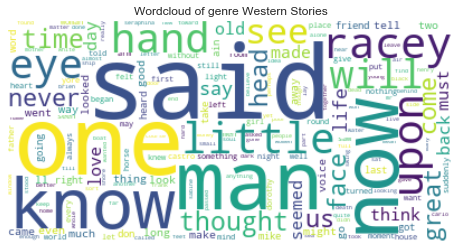

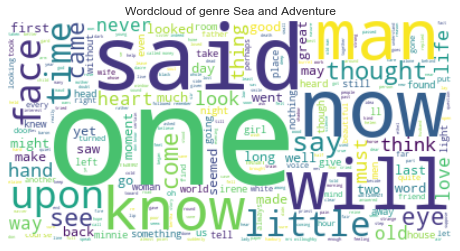

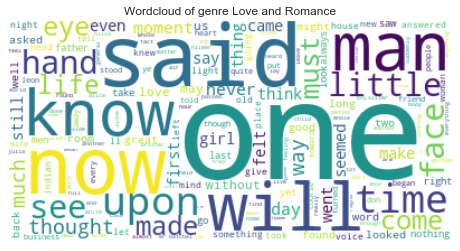

<Figure size 576x396 with 0 Axes>

In [0]:
# Read the whole text
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import matplotlib.pyplot as plt
list_text = [ws_s_c, sa_s_c, lr_s_c]

genre_list = ['Western Stories', 'Sea and Adventure', 'Love and Romance']

stopwords = set(STOPWORDS)

for i in range(3):
    wc = WordCloud(background_color="white", max_words=2000,
                   stopwords=stopwords)
    # generate word cloud
    wc.generate(list_text[i])
    # show
    plt.imshow(wc, interpolation='bilinear')
    plt.title('Wordcloud of genre ' + genre_list[i])
    plt.axis("off")
    plt.figure()
    # store to file
    wc.to_file("{}_wordcloud.png".format(genre_list[i]))

plt.show()